# Práctica 2
#### Análisis sobre datos de árboles en CABA (en espacios verdes)

Dataset usado: [Arbolado en espacios verdes](https://data.buenosaires.gob.ar/dataset/arbolado-espacios-verdes)

-------

### Preparación de datos

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def refrescar_arboles():
    return pd.read_csv("Materiales/arbolado-en-espacios-verdes.csv")

arboles = refrescar_arboles()
arboles.dtypes

long          float64
lat           float64
id_arbol        int64
altura_tot      int64
diametro        int64
inclinacio      int64
id_especie      int64
nombre_com     object
nombre_cie     object
tipo_folla     object
espacio_ve     object
ubicacion      object
nombre_fam     object
nombre_gen     object
origen         object
coord_x       float64
coord_y       float64
dtype: object

---------

### Ejercicio 1

Definir una función leer_parque(nombre_archivo, parque) que abra el 
archivo indicado y devuelva una lista de diccionarios con la información de 
parque especificado. La lista debe tener un diccionario por cada árbol del parq e
elegido. Dicho diccionario debe tener los datos correspondientes a un ár ol
(recordar que cada fila del csv corresponde a un árb l).
Probar la función en el parque ‘GENERAL PAZ’ y debería dar una lista co  690
á.rboles

In [3]:
def leer_parque(nombre_archivo, parque):
    trees = pd.read_csv("Materiales/arbolado-en-espacios-verdes.csv")
    trees = trees[trees['espacio_ve'] == parque]
    return trees.to_dict(orient='records')

len(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")) # 690
res_ej1 = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")

print(len(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")))
leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")[:1]

690


[{'long': -58.5050933042,
  'lat': -34.5675817714,
  'id_arbol': 1380,
  'altura_tot': 20,
  'diametro': 33,
  'inclinacio': 5,
  'id_especie': 330,
  'nombre_com': 'Eucalipto',
  'nombre_cie': 'Eucalyptus sp.',
  'tipo_folla': 'Árbol Latifoliado Perenne',
  'espacio_ve': 'GENERAL PAZ',
  'ubicacion': 'LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AIZPURUA',
  'nombre_fam': 'Mirtáceas',
  'nombre_gen': 'Eucalyptus',
  'origen': 'Exótico',
  'coord_x': 96164.756178,
  'coord_y': 106842.465407}]

---------

### Ejercicio 2

Escribir una función especies(lista_arboles) que tome una lista de árboles 
como la generada en el ejercicio anterior y devuelva el conjunto de especies (l 
columna 'nombre_com' del archivo) que figuran en la list.

In [4]:
def especies(lista_arboles):
    '''
        lista_arboles: list(dict()), tal como se devuelve en leer_parque(...)
        return: set de especies contenidas en lista_arboles
    '''
    # Opcion 1
    trees = pd.DataFrame(lista_arboles)['nombre_com'].unique()
    return set(trees)

ej2_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
res_ej2 = especies(ej2_generalpaz)

res_ej2

{'Acacia blanca',
 'Acacia negra',
 'Alcanforero',
 'Arce negundo',
 'Bunya-bunya (Araucaria de Bidwill)',
 'Caqui',
 'Casuarina',
 'Cedrela',
 'Cedro',
 'Cedro de San Juan',
 'Cedro del Atlas (Cedro plateado o Cedro atlántico)',
 'Cedro del Himalaya',
 'Cedro del Himalaya variedad aurea',
 'Ceibo',
 'Chamaecyparis',
 'Ciprés',
 'Ciprés blanco',
 'Ciprés calvo',
 'Ciprés leylandi',
 'Corona de cristo',
 'Criptomeria (Cedro del Japón)',
 'Eucalipto',
 'Falso Guayabo (Guayaba del Brasil)',
 'Fenix',
 'Ficus',
 'Fotinia',
 'Fresno (Fresno común)',
 'Fresno americano',
 'Ginkgo',
 'Jacarandá',
 'Juniperus',
 'Lapacho rosado',
 'Laurel de jardin (Laurel de flor)',
 'Laurus',
 'Libocedro (Calocedro)',
 'Ligustro',
 'Ligustro disciplinado (Ligustro variegado)',
 'Limpiatubos',
 'Liquidambar',
 'Macrocarpa (Ciprés de Monterrey o Ciprés de Lambert)',
 'Magnolia',
 'Morera blanca',
 'Morera de papel (Moral de China)',
 'Morera negra',
 'No Determinable',
 'No Determinado',
 'Nogal europeo (Nogal

---------

### Ejercicio 3


Escribir una función contar_ejemplares(lista_arboles) que, dada una lista como la generada con leer_parque(...), devuelva un diccionario en el que las especies sean las claves y tengan como valores asociados la cantidad de ejemplares en esa especie en la lista dada. Debería verse que en el parque General Paz hay 20 Jacarandás, en el Parque Los Andes hay 3 Tilos y en Parque Centenario hay 1 Laurel.


In [5]:
def contar_ejemplares(lista_arboles):
    trees = pd.DataFrame(lista_arboles)['nombre_com'].value_counts()
    return trees.to_dict()

# ej3_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
ej3_losandes = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "ANDES, LOS")
# ej3_centenario = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "CENTENARIO")

contar_ejemplares(ej3_losandes)

{'Jacarandá': 117,
 'Tipa blanca': 28,
 'Ciprés': 21,
 'Palo borracho rosado': 18,
 'Lapacho': 12,
 'Pindó': 12,
 'Plátano': 12,
 'Ligustro': 7,
 'Fresno americano': 7,
 'Pino': 6,
 'Ginkgo': 6,
 'Cedro': 5,
 'Eucalipto': 5,
 'Gomero': 4,
 'Pata de vaca  (Pezuña de vaca)': 4,
 'Cedro del Himalaya': 4,
 'Arce negundo': 4,
 'Sófora japónica': 4,
 'Aguaribay': 3,
 'Acacia': 3,
 'Tilo': 3,
 'Morera blanca': 3,
 'Árbol del cielo (Ailanto o Árbol de los dioses)': 2,
 'Pino del Paraná (Pino de Misiones o Pino de Brasil)': 2,
 'Acacia frisia': 2,
 'Casuarina': 2,
 'Pino de las canarias': 2,
 'Olmo europeo': 2,
 'Acacia blanca': 2,
 'Libocedro (Calocedro)': 1,
 'Liquidambar': 1,
 'Morus': 1,
 'Encina': 1,
 'Almez (Almecino o Almecina)': 1,
 'Álamo plateado': 1,
 'Laurel': 1,
 'Trachycarpus': 1,
 'Fresno (Fresno común)': 1,
 'Paraíso': 1,
 'Kauri de corteza lisa': 1,
 'Ficus': 1,
 'Corona de cristo': 1,
 'Ciprés calvo': 1}

---------

### Ejercicio 4


Escribir una función obtener_alturas(lista_arboles, especie) que, 
dada una lista como la generada con leer_parque(...) y una especie d 
árbol (un valor de la columna 'nombre_com' del archivo), devuelva una lista c n
las alturas (columna 'altura_tot') de los ejemplares de esa especie en la lista.

In [6]:
def obtener_alturas(lista_arboles, especie):
    trees = pd.DataFrame(lista_arboles)
    res = trees[trees['nombre_com'] == especie]['altura_tot']
    return res

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO']
arbol_a_buscar = 'Jacarandá'
for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    temp_alturas = obtener_alturas(temp_df, arbol_a_buscar)
    print(f'En el parque \'{parque}\' para {arbol_a_buscar} el máximo es {temp_alturas.max()} y el promedio es {temp_alturas.mean():.2f}')

En el parque 'GENERAL PAZ' para Jacarandá el máximo es 16 y el promedio es 10.20
En el parque 'ANDES, LOS' para Jacarandá el máximo es 25 y el promedio es 10.54
En el parque 'CENTENARIO' para Jacarandá el máximo es 18 y el promedio es 8.96


In [7]:
# Resolución al mismo problema mostrando en tabla (parques_a_buscar y arbol_a_buscar se toman de antes)
ej4_res = pd.DataFrame(columns=['Medida'] + parques_a_buscar)
ej4_res.set_index(['Medida'], inplace=True)

max_list = []
prom_list = []

for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    temp_alturas = obtener_alturas(temp_df, arbol_a_buscar)
    max_list = max_list + [temp_alturas.max()]
    prom_list = prom_list + [round(temp_alturas.mean(), 2)]
    # print(f'Para {arbol_a_buscar} el máximo es {temp_alturas.max()} y el promedio es {temp_alturas.mean():.2f}')

ej4_res.loc['max'] = max_list
ej4_res.loc['prom'] = prom_list

ej4_res

,GENERAL PAZ,"ANDES, LOS",CENTENARIO
Medida,,,
max,16.0,25.00,18.00
prom,10.2,10.54,8.96


---------

### Ejercicio 5

Escribir una función obtener_inclinaciones(lista_arboles, especie) que, dada una lista como la generada con leer_parque(...) y una especie de árbol, devuelva una lista con las inclinaciones (columna 'inclinacio') de los ejemplares de esa especie.

In [8]:
def obtener_inclinaciones(lista_arboles, especie):
    trees = pd.DataFrame(lista_arboles)
    return list(trees[trees['nombre_com'] == especie]['inclinacio'].unique())

ej5_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
obtener_inclinaciones(ej5_generalpaz, 'Jacarandá')

[0, 25, 17, 13, 6, 11, 15, 5, 24, 20]

---------

### Ejercicio 6

Combinando la función especies() con obtener_inclinaciones() escribir una función especimen_mas_inclinado(lista_arboles) que, dada una lista de árboles devuelva la especie que tiene el ejemplar más inclinado y su inclinación.

In [19]:
def especimen_mas_inclinado(lista_arboles):
    '''
        lista_arboles: list(dict(...)) que contiene arboles
        return: lista de dos elementos que tienen la inclinación máxima dentro de lista_arboles: [lista de especies que cumplen (en caso de repetidos), inclinación máxima]
    '''
    temp_df = pd.DataFrame(lista_arboles)
    temp_max = temp_df['inclinacio'].max()
    return [temp_df[temp_df['inclinacio'] == temp_max]['nombre_com'].to_list(), temp_max]

# Ejecución

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO']
ej6_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada', 'Inclinación'])
ej6_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    ej6_res.loc[parque] = especimen_mas_inclinado(temp_df) # es una lista con primer elemento lista de especies y segundo elemento max inclinación

ej6_res

,Especie más inclinada,Inclinación
Parque,,
GENERAL PAZ,[Macrocarpa (Ciprés de Monterrey o Ciprés de L...,70
"ANDES, LOS",[Jacarandá],30
CENTENARIO,[Falso Guayabo (Guayaba del Brasil)],80


---------

### Ejercicio 7

Volver a combinar las funciones anteriores para escribir la función especie_promedio_mas_inclinada(lista_arboles) que, dada una lista de árboles devuelva la especie que en promedio tiene la mayor inclinación y el promedio calculado.


In [101]:
def especie_promedio_mas_inclinada(lista_arboles):
    '''
        Descripción: una función que manualmente calcula, para cada especie, el promedio de inclinación y devuelve la especie con el valor máximo promedio
        lista_arboles: list(dict(...)) de arboles (ya prefiltrado por parque)
        return: lista de dos elementos que tienen la inclinación promedio máxima dentro de lista_arboles: [lista de especies que cumplen (en caso de repetidos), inclinación promedio máxima]
    '''
    temp_df = pd.DataFrame(lista_arboles)
    temp_especies = list(especies(lista_arboles))
    
    especie_max_avg_value = temp_df[temp_df['nombre_com'] == temp_especies[0]]['inclinacio'].mean()
    especie_max_names = [temp_especies[0]]

    for i in range(1, len(temp_especies)):
        temp_especie = temp_especies[i]
        temp_max = temp_df[temp_df['nombre_com'] == temp_especie]['inclinacio'].mean()
        if temp_max > especie_max_avg_value:
            especie_max_avg_value = temp_max
            especie_max_names = [temp_especie]
        elif temp_max == especie_max_avg_value:
            especie_max_names.append(temp_especie)

    return [especie_max_names, especie_max_avg_value.round(2)]

# Ejecución

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO', 'LAGO REGATAS', 'SICILIA']
ej7_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada (en promedio)', 'Inclinación promedio'])
ej7_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = pd.DataFrame(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque))
    ej7_res.loc[parque] = especie_promedio_mas_inclinada(temp_df) # es una lista con primer elemento lista de especies y segundo elemento max inclinación promedio

ej7_res

,Especie más inclinada (en promedio),Inclinación promedio
Parque,,
GENERAL PAZ,[No Determinable],25.00
"ANDES, LOS",[Álamo plateado],25.00
CENTENARIO,[Rosa de Siria],25.00
LAGO REGATAS,[Paraíso],17.86
SICILIA,[Espinillo (Aromo)],60.00


##### Resolución alternativa usando GROUP BY

In [102]:
parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO', 'LAGO REGATAS', 'SICILIA']
ej7_alt_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada (en promedio)', 'Inclinación promedio'])
ej7_alt_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = pd.DataFrame(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque))
    temp_res = temp_df.groupby(by=['nombre_com'])['inclinacio'].mean().sort_values(ascending=False).head(1)
    ej7_alt_res.loc[parque] = [temp_res.index.to_list(), temp_res.iloc[0].round(2)]

ej7_alt_res

,Especie más inclinada (en promedio),Inclinación promedio
Parque,,
GENERAL PAZ,[No Determinable],25.00
"ANDES, LOS",[Álamo plateado],25.00
CENTENARIO,[Rosa de Siria],25.00
LAGO REGATAS,[Paraíso],17.86
SICILIA,[Espinillo (Aromo)],60.00


#### Análisis sobre datos de árboles en CABA

Dataset usado: [Arbolado en veredas](https://data.buenosaires.gob.ar/dataset/arbolado-publico-lineal)

-------

In [121]:
### Preparación de datos

data_arboles_veredas = pd.read_csv('Materiales/arbolado-en-veredas.csv')
data_arboles_veredas = data_arboles_veredas[['nombre_cientifico', 'ancho_acera', 'diametro_altura_pecho', 'altura_arbol']]
# data_arboles_veredas.info()

especies_seleccionadas = ['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu']

# Copiamos los datasets para empezar a trabajarlos
df_tipas_parques = arboles[['nombre_cie', 'diametro', 'altura_tot']].copy()
df_tipas_parques.columns = ['nombre_cientifico', 'diametro_altura_pecho', 'altura_arbol'] # lo saqué de hacer df_tipas_veredas.columns

df_tipas_veredas = data_arboles_veredas.copy()

C:\Users\Matias\AppData\Local\Temp\ipykernel_12244\1522486272.py:3: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_arboles_veredas = pd.read_csv('Materiales/arbolado-en-veredas.csv')


In [122]:
# Visualización de datos

In [124]:
df_tipas_parques.describe()

,diametro_altura_pecho,altura_arbol
count,51502.000000,51502.000000
mean,39.395616,12.167100
std,31.171205,7.640309
min,1.000000,0.000000
25%,18.000000,6.000000
50%,32.000000,11.000000
75%,54.000000,18.000000
max,500.000000,54.000000


In [114]:
df_tipas_veredas.describe()

,diametro_altura_pecho,altura_arbol
count,369894.000000,365858.000000
mean,31.986864,9.036132
std,21.267623,4.894625
min,0.000000,1.000000
25%,17.000000,6.000000
50%,29.000000,8.000000
75%,43.000000,12.000000
max,199.000000,40.000000


#### Comparamos los nombres cientificos en ambos datasets y unificamos

En este caso, vemos que los nombres ['Tilia x moltkei', 'Jacarandá mimosifolia', 'Tipuana tipu'] se ven en el primer dataset como []

-------

In [144]:
df_tipas_parques[df_tipas_parques['nombre_cientifico'].str.contains('oltkei')]['nombre_cientifico'].unique()

# Cambiamos los valores
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('oltkei'), 'nombre_cientifico'] = 'Tilia x moltkei'
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('acarand'), 'nombre_cientifico'] = 'Jacaranda mimosifolia'
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('ipuan'), 'nombre_cientifico'] = 'Tipuana tipu'

In [159]:
# Chequeamos que ambos datasets están con valores unificados de especies_seleccionadas
res = True

for esp in especies_seleccionadas:
    res = res and (df_tipas_parques['nombre_cientifico'] == esp).any() and (df_tipas_veredas['nombre_cientifico'] == esp).any()

res

True

In [ ]:
# Ejercicio 9

In [169]:
# df_tipas_parques['ambiente'] = pd.Series(['parques']*df_tipas_parques.shape[0])
df_tipas_parques['ambiente'] = 'parque'
df_tipas_veredas['ambiente'] = 'vereda'

In [173]:
# Ejercicio 10

In [170]:
df_tipas_global = pd.concat([df_tipas_parques, df_tipas_veredas])

In [171]:
df_tipas_global

,nombre_cientifico,diametro_altura_pecho,altura_arbol,ambiente,ancho_acera
0,Washingtonia filifera,35.0,6.0,parque,NaN
1,Washingtonia filifera,35.0,6.0,parque,NaN
2,Washingtonia filifera,35.0,6.0,parque,NaN
3,Phytolacca dioica,50.0,17.0,parque,NaN
4,Phytolacca dioica,50.0,17.0,parque,NaN
...,...,...,...,...,...
370175,Ceiba speciosa,34.0,7.0,vereda,3.3
370176,Melia azedarach,45.0,8.0,vereda,3.3
370177,Ceiba speciosa,60.0,8.0,vereda,3.3
370178,Ceiba speciosa,64.0,8.0,vereda,3.3


## Ejercicio 11 - Experimentación y análisis

--------

#### Posibles preguntas:
- Hay alguna diferencia de altura entre árboles de parques y de veredas?
- Hay alguna diferencia de diámetro entre árboles de parques y de veredas?
- Hay alguna relación entre altura y diámetro que sea constante entre ambos datasets? (comparar coeficientes: dos números)


In [175]:
df_tipas_global.describe()

,diametro_altura_pecho,altura_arbol
count,421396.000000,417360.000000
mean,32.892344,9.422491
std,22.840091,5.409683
min,0.000000,0.000000
25%,17.000000,6.000000
50%,29.000000,9.000000
75%,45.000000,12.000000
max,500.000000,54.000000


In [176]:
especies_seleccionadas

['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu']

#### ¿Hay diferencia de alturas entre árboles de parques y veredas?



In [179]:
alturas_vereda

NameError: name 'alturas_vereda' is not defined

Text(0.5, 1.0, 'My pretty hist')

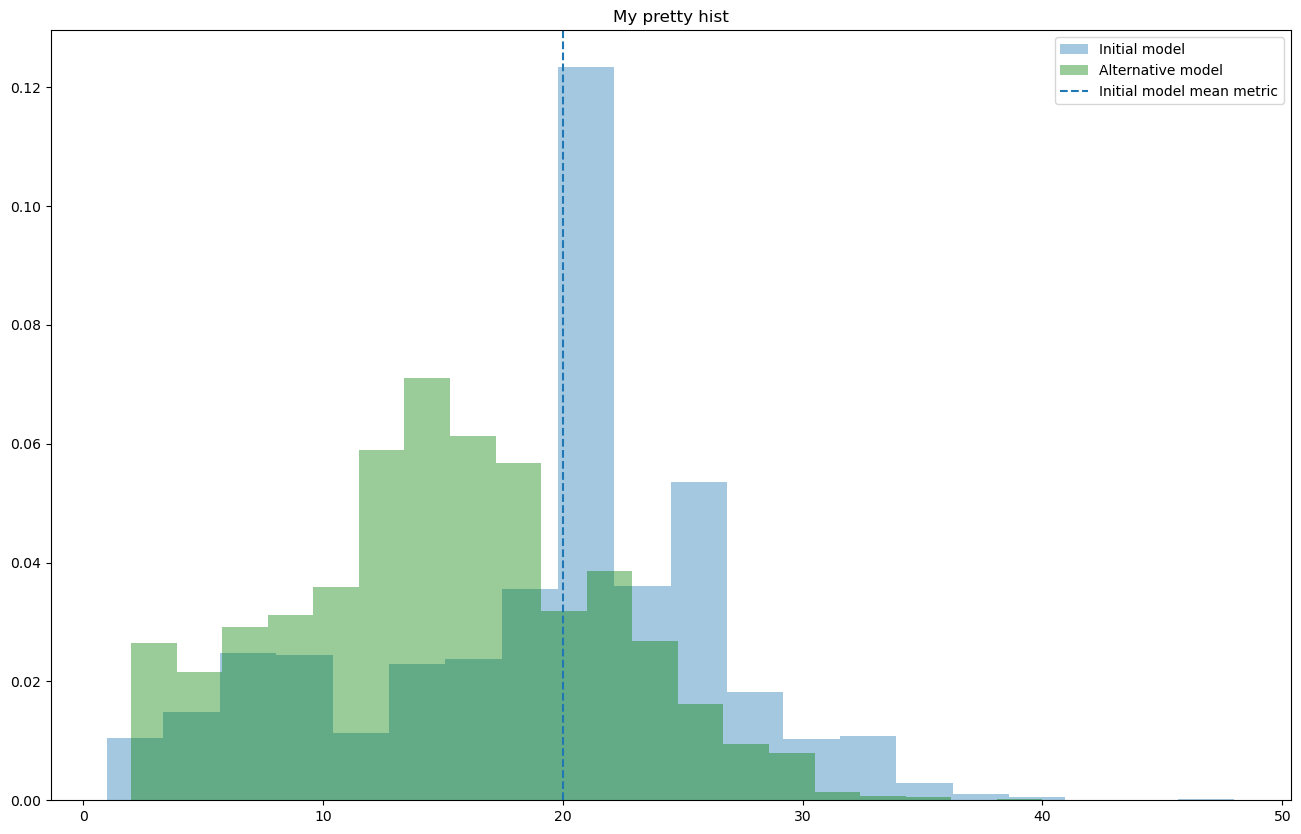

In [198]:
# Altura promedio (todos los arboles)
# Altura std

# Altura promedio (por especie)

# df_tipas_parques

alturas_parque = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']
alturas_vereda = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']

#alturas_vereda

plt.figure(figsize=(16, 10))
plt.hist(alturas_parque, bins=20, alpha=0.4, density=True, label='Initial model')
plt.hist(alturas_vereda, bins=20, alpha=0.4,  density=True, facecolor='green', label='Alternative model')
plt.axvline(alturas_parque.median(), 0, 1, label='Initial model mean metric', linestyle='dashed')


        # plt.xlabel(self.metric, fontsize=16)
        # plt.ylabel('% of evidence', fontsize=16)
# plt.title('Distribution of {} score'.format(self.metric), fontsize=18)
plt.legend()
        # plt.show()

plt.title('My pretty hist')